<a href="https://colab.research.google.com/github/rjalokssb/Machine-Learning-Projects/blob/main/Iris_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

# Import modules

In [3]:
!pip install opendatasets --quiet

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

# Loading the dataset

In [5]:
download_url = 'https://www.kaggle.com/datasets/uciml/iris'
od.download(download_url)

100%|██████████| 3.60k/3.60k [00:00<00:00, 2.26MB/s]

In [7]:
os.listdir('/content/iris')

['database.sqlite', 'Iris.csv']

In [8]:
df = pd.read_csv('/content/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# delete a column
df = df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [14]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

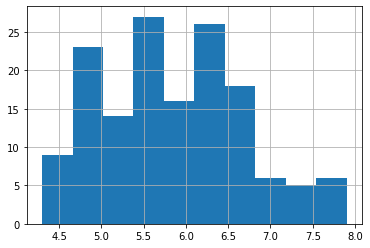

In [21]:
# histograms
df['SepalLengthCm'].hist()

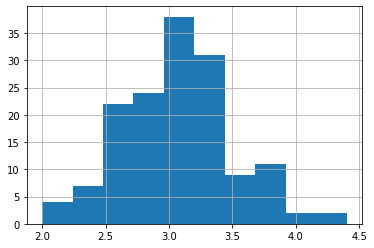

In [22]:
df['SepalWidthCm'].hist()

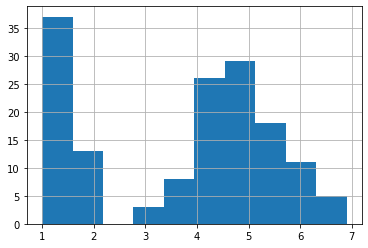

In [23]:
df['PetalLengthCm'].hist()

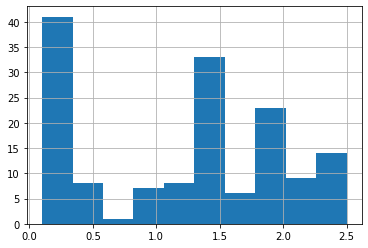

In [24]:
df['PetalWidthCm'].hist()

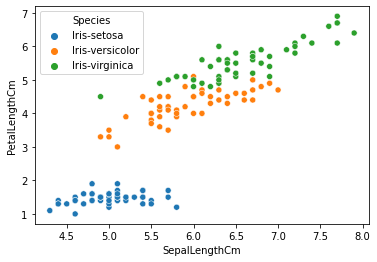

In [27]:
# scatterplot
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

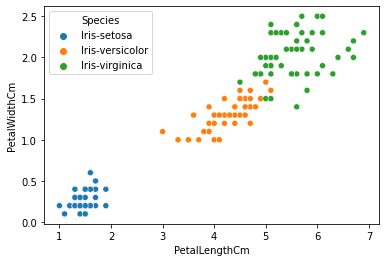

In [28]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

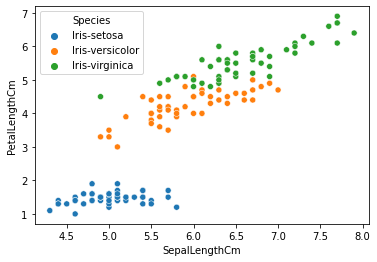

In [31]:
sns.scatterplot(data=df, x="SepalLengthCm", y="PetalLengthCm", hue="Species")

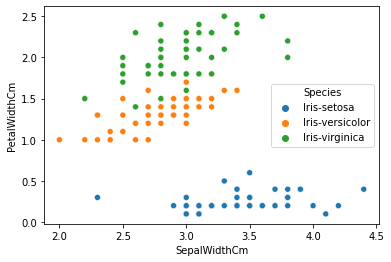

In [32]:
sns.scatterplot(data=df, x="SepalWidthCm", y="PetalWidthCm", hue="Species")

# Coorelation Matrix

In [34]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


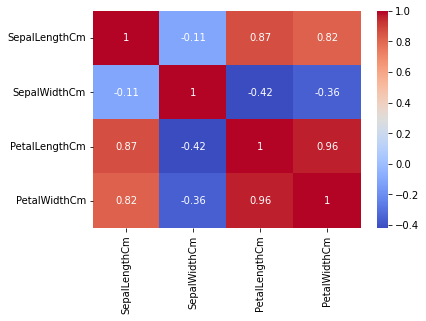

In [39]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df['Species'] = le.fit_transform(df['Species'])
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [47]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Model Training

In [53]:
inputs = df.drop(columns=['Species'])
targets = df['Species']

In [74]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, test_size= 0.3)

In [78]:
print('train_inputs.shape', train_inputs.shape)
print('train_targets.shape', train_targets.shape)
print('test_inputs.shape', test_inputs.shape)
print('test_targets.shape', test_targets.shape)

train_inputs.shape (105, 4)
train_targets.shape (105,)
test_inputs.shape (45, 4)
test_targets.shape (45,)


In [79]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [80]:
# model training
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
# print metric to get performance
print("Accuracy: ",model.score(test_inputs, test_targets) * 100)

Accuracy:  93.33333333333333


In [82]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [83]:
# model training
model.fit(train_inputs, train_targets)

KNeighborsClassifier()

In [84]:
# print metric to get performance
print("Accuracy: ",model.score(test_inputs, test_targets) * 100)

Accuracy:  95.55555555555556


In [85]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [86]:
# model training
model.fit(train_inputs, train_targets)

DecisionTreeClassifier()

In [87]:
# print metric to get performance
print("Accuracy: ",model.score(test_inputs, test_targets) * 100)

Accuracy:  91.11111111111111
